## Observations and Insights 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_data = pd.merge(mouse_metadata,study_results, how="outer", on="Mouse ID")

# Display the data table for preview
complete_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice. Should be 
len(complete_data['Mouse ID'].unique())

249

In [7]:
#filter for duplicated Mouse ID and Times
complete_data.duplicated(subset = ['Mouse ID','Timepoint']).head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [8]:
#show the Mouse with the duplicated data
complete_data[complete_data.duplicated(subset = ['Mouse ID','Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# drop the Mouse with duped data
# all data for g989 was dropped due to differences in the Tumor Volume
#since we are unable to determine which was the valid data set, both sets were dropped. 
clean_data = complete_data.loc[(complete_data['Mouse ID'] != 'g989'),:]

In [10]:
#check to make sure the dupe mouse was dropped
clean_data[clean_data.duplicated(subset = ['Mouse ID','Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [11]:
# Checking the number of mice in the clean DataFrame.
len(clean_data['Mouse ID'].unique())

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
by_regimen = clean_data.groupby('Drug Regimen')
tvmean_by_reg = by_regimen['Tumor Volume (mm3)'].mean()
tvmedian_by_reg = by_regimen['Tumor Volume (mm3)'].median()
tvvar_by_reg = by_regimen['Tumor Volume (mm3)'].var()
tvstd_by_reg = by_regimen['Tumor Volume (mm3)'].std()
tvsem_by_reg = by_regimen['Tumor Volume (mm3)'].sem()

tumor_by_regimen = pd.DataFrame({
    "Tumor Mean": tvmean_by_reg,
    "Tumor Median": tvmedian_by_reg,
    "Tumor Variance": tvvar_by_reg,
    "Tumor Standard Deviation": tvstd_by_reg,
    "Standard Error of Mean": tvsem_by_reg
})

tumor_by_regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,Tumor Mean,Tumor Median,Tumor Variance,Tumor Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
by_regimen['Tumor Volume (mm3)'].aggregate(['mean','median','var','std','sem'])


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [14]:
complete_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


<function matplotlib.pyplot.show(close=None, block=None)>

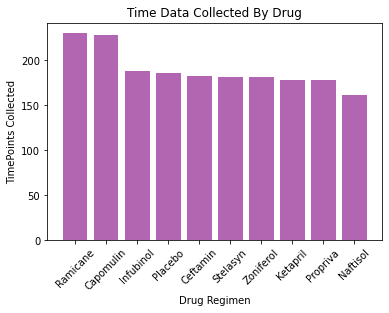

In [28]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Panda
time_by_drug = complete_data['Drug Regimen'].value_counts()
drug_names = complete_data['Drug Regimen'].unique()

plt.bar(drug_names,time_by_drug,color="purple",alpha=0.6,width=0.8)
plt.xticks(rotation = 45) 
plt.title('Time Data Collected By Drug')
plt.xlabel('Drug Regimen')
plt.ylabel('TimePoints Collected')
plt.show

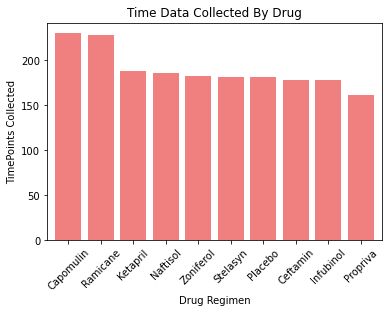

In [30]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
count_by_drug = complete_data['Drug Regimen'].value_counts()
count_by_drug.plot(kind='bar', color="lightcoral",alpha=1,width=0.8)
plt.xticks(rotation = 45) 
plt.title('Time Data Collected By Drug')
plt.xlabel('Drug Regimen')
plt.ylabel('TimePoints Collected')
plt.show()

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Panda
sex = complete_data['Sex'].value_counts()

#plt.bar(drug_names,time_by_drug,color="purple",alpha=0.6,width=0.8)
#plt.xticks(rotation = 45) 
#plt.title('Time Data Collected By Drug')
#plt.xlabel('Drug Regimen')
#plt.ylabel('TimePoints Collected')
#plt.show


Male      958
Female    935
Name: Sex, dtype: int64

<AxesSubplot:ylabel='Sex'>

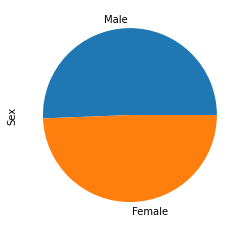

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = complete_data['Sex'].value_counts()

sex.plot(kind='pie')

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
